<a href="https://colab.research.google.com/github/shun0109/colab/blob/main/processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn --quiet

import pandas as pd
import numpy as np
from scipy import stats, integrate
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression, LinearRegression,Ridge,SGDClassifier
from sklearn.metrics import accuracy_score,roc_curve, confusion_matrix,classification_report,mean_squared_error,precision_score, \
recall_score,f1_score,classification_report,precision_recall_curve, roc_auc_score, ConfusionMatrixDisplay
from collections import Counter
from IPython.core.display import display, HTML
import glob
%matplotlib inline

In [2]:
!apt-get -y install fonts-ipafont-gothic
!pip install japanize-matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt

# 場合によっては必要
plt.rcParams['font.family'] = 'IPAPGothic'
japanize_matplotlib.japanize()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 8,237 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-gothic all 00303-21ubuntu1 [3,513 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-ipafont-mincho all 00303-21ubuntu1 [4,724 kB]
Fetched 8,237 kB in 1s (16.2 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 126380 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-gothic_00303-21ubuntu1_all.deb ...
Unpacking fonts-ipafont-gothic (00303-21ubuntu1) ...
Selecting previously unselected package fonts-ipaf

In [ ]:
# !cd

In [ ]:
# pd.read_csv('/01_Hokkaido_20201_20251.csv', encoding="CP932")

,種類,価格情報区分,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,用途,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時期,取引の事情等
0,宅地(土地),不動産取引価格情報,住宅地,1101,北海道,札幌市中央区,旭ケ丘,円山公園,30分～60分,94000000,...,NaN,住宅,北西,市道,8.2,１種住居,60.0,200.0,2024年第3四半期,NaN
1,宅地(土地),不動産取引価格情報,住宅地,1101,北海道,札幌市中央区,旭ケ丘,円山公園,23,25000000,...,NaN,事務所,東,道道,15.0,１種住居,60.0,200.0,2023年第4四半期,NaN
2,宅地(土地),不動産取引価格情報,住宅地,1101,北海道,札幌市中央区,旭ケ丘,円山公園,23,16000000,...,NaN,住宅,西,市道,6.0,１低住専,40.0,80.0,2023年第4四半期,NaN
3,宅地(土地),不動産取引価格情報,住宅地,1101,北海道,札幌市中央区,旭ケ丘,円山公園,21,92000000,...,NaN,住宅,西,市道,14.5,１種住居,60.0,200.0,2023年第2四半期,NaN
4,宅地(土地と建物),不動産取引価格情報,住宅地,1101,北海道,札幌市中央区,旭ケ丘,円山公園,28,78000000,...,住宅,住宅,北東,道道,15.0,１種住居,60.0,200.0,2023年第1四半期,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68841,宅地(土地と建物),不動産取引価格情報,住宅地,1694,北海道,目梨郡羅臼町,（大字なし）,NaN,NaN,690000,...,住宅、倉庫,住宅,北西,道道,16.0,都計外,NaN,NaN,2020年第4四半期,NaN
68842,宅地(土地),不動産取引価格情報,住宅地,1694,北海道,目梨郡羅臼町,（大字なし）,NaN,NaN,600000,...,NaN,NaN,南東,国道,25.0,都計外,NaN,NaN,2020年第3四半期,NaN
68843,宅地(土地と建物),不動産取引価格情報,住宅地,1694,北海道,目梨郡羅臼町,（大字なし）,NaN,NaN,3200000,...,住宅,住宅,接面道路無,NaN,NaN,都計外,NaN,NaN,2020年第2四半期,NaN
68844,宅地(土地),不動産取引価格情報,住宅地,1694,北海道,目梨郡羅臼町,（大字なし）,NaN,NaN,3000000,...,NaN,倉庫,北西,道道,14.0,都計外,NaN,NaN,2020年第1四半期,NaN


In [3]:
file_paths = glob.glob('/*.csv')

dataframes = []

for file_path in file_paths:
    temp = pd.read_csv(file_path, low_memory=False,encoding="CP932")
    dataframes.append(temp)

# Concatenate all the DataFrames into one big DataFrame
df = pd.concat(dataframes, ignore_index=True)
df

,種類,価格情報区分,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,今後の利用目的,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時期,改装,取引の事情等
0,宅地(土地と建物),成約価格情報,NaN,43101,熊本県,熊本市中央区,出水,NaN,NaN,31000000,...,NaN,西,NaN,5.0,２中住専,60.0,200.0,2021年第1四半期,NaN,NaN
1,宅地(土地と建物),成約価格情報,NaN,43101,熊本県,熊本市中央区,出水,水前寺公園,5,57000000,...,NaN,北西,私道,4.0,２中住専,60.0,200.0,2021年第1四半期,NaN,NaN
2,中古マンション等,成約価格情報,NaN,43101,熊本県,熊本市中央区,京町本丁,上熊本(ＪＲ・熊本電鉄),10,33000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021年第1四半期,NaN,NaN
3,中古マンション等,成約価格情報,NaN,43101,熊本県,熊本市中央区,京町本丁,NaN,NaN,25000000,...,NaN,NaN,NaN,NaN,２中住専,NaN,NaN,2021年第1四半期,NaN,NaN
4,中古マンション等,成約価格情報,NaN,43101,熊本県,熊本市中央区,新大江,水前寺,3,1800000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021年第1四半期,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086731,農地,不動産取引価格情報,NaN,44462,大分県,玖珠郡玖珠町,大字四日市,NaN,NaN,300000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022年第4四半期,NaN,NaN
2086732,農地,不動産取引価格情報,NaN,44462,大分県,玖珠郡玖珠町,大字四日市,NaN,NaN,1500000,...,その他,NaN,NaN,NaN,NaN,NaN,NaN,2022年第4四半期,NaN,NaN
2086733,林地,不動産取引価格情報,NaN,44462,大分県,玖珠郡玖珠町,大字四日市,NaN,NaN,680000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021年第4四半期,NaN,NaN
2086734,林地,不動産取引価格情報,NaN,44462,大分県,玖珠郡玖珠町,大字四日市,NaN,NaN,30000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021年第2四半期,NaN,NaN


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
df.columns

Index(['種類', '価格情報区分', '地域', '市区町村コード', '都道府県名', '市区町村名', '地区名', '最寄駅：名称',
       '最寄駅：距離（分）', '取引価格（総額）', '坪単価', '間取り', '面積（㎡）', '取引価格（㎡単価）', '土地の形状',
       '間口', '延床面積（㎡）', '建築年', '建物の構造', '用途', '今後の利用目的', '前面道路：方位', '前面道路：種類',
       '前面道路：幅員（ｍ）', '都市計画', '建ぺい率（％）', '容積率（％）', '取引時期', '改装', '取引の事情等'],
      dtype='object')

In [5]:
df['土地の形状'].unique()

array([nan, 'ほぼ長方形', 'ほぼ正方形', 'ほぼ整形', '台形', '不整形', '長方形', 'ほぼ台形', '袋地等',
       '正方形'], dtype=object)

In [6]:
df['取引時期'].unique()

array(['2021年第1四半期', '2021年第2四半期', '2021年第3四半期', '2021年第4四半期',
       '2022年第1四半期', '2022年第2四半期', '2022年第3四半期', '2022年第4四半期',
       '2023年第1四半期', '2023年第2四半期', '2023年第3四半期', '2023年第4四半期',
       '2024年第1四半期', '2024年第2四半期', '2024年第3四半期', '2024年第4四半期',
       '2025年第1四半期', '2020年第4四半期', '2020年第3四半期', '2020年第2四半期',
       '2020年第1四半期'], dtype=object)

In [7]:
df['取引時期'].str.split(r"年第|四半期",expand=True).iloc[:,1]

,1
0,1
1,1
2,1
3,1
4,1
...,...
2086731,4
2086732,4
2086733,4
2086734,2


In [8]:
df=df.assign(取引年=df['取引時期'].str.split(r"年第|四半期",expand=True).iloc[:,0])
df=df.assign(取引四半期=df['取引時期'].str.split(r"年第|四半期",expand=True).iloc[:,1])
df[['取引年','取引四半期']].head()

,取引年,取引四半期
0,2021,1
1,2021,1
2,2021,1
3,2021,1
4,2021,1


In [9]:
df['建築年'].unique()

array(['1988年', '1999年', '2014年', nan, '1989年', '2007年', '2006年', '1974年',
       '2005年', '2011年', '1991年', '2008年', '1998年', '1979年', '1992年',
       '1990年', '1984年', '1997年', '2018年', '2017年', '1993年', '2000年',
       '1973年', '1980年', '2019年', '1985年', '2002年', '2021年', '1978年',
       '1982年', '1977年', '2015年', '2003年', '1976年', '1996年', '2009年',
       '2020年', '2013年', '2001年', '1995年', '1981年', '2004年', '2012年',
       '1987年', '2016年', '1986年', '2022年', '1971年', '1983年', '2010年',
       '2023年', '1975年', '1972年', '1994年', '1956年', '2024年', '1968年',
       '1965年', '戦前', '2025年', '1970年', '1966年', '1958年', '1967年',
       '1969年', '1960年', '1953年', '1949年', '1964年', '1962年', '1955年',
       '1950年', '1954年', '1961年', '1963年', '1951年', '1946年', '1947年',
       '1959年', '1948年', '1957年', '1952年', '2026年', '2027年'], dtype=object)

In [10]:
df=df.assign(建築年=df['建築年'].str.split(r"\年",expand=True).iloc[:,0])
df['建築年']=df['建築年'].apply(lambda x:
                          1945 if x=='戦前' else
                          x)
df['建築年'].head()

,建築年
0,1988
1,1999
2,2014
3,NaN
4,1989


In [11]:
df['建築年'].unique()

array(['1988', '1999', '2014', nan, '1989', '2007', '2006', '1974',
       '2005', '2011', '1991', '2008', '1998', '1979', '1992', '1990',
       '1984', '1997', '2018', '2017', '1993', '2000', '1973', '1980',
       '2019', '1985', '2002', '2021', '1978', '1982', '1977', '2015',
       '2003', '1976', '1996', '2009', '2020', '2013', '2001', '1995',
       '1981', '2004', '2012', '1987', '2016', '1986', '2022', '1971',
       '1983', '2010', '2023', '1975', '1972', '1994', '1956', '2024',
       '1968', '1965', 1945, '2025', '1970', '1966', '1958', '1967',
       '1969', '1960', '1953', '1949', '1964', '1962', '1955', '1950',
       '1954', '1961', '1963', '1951', '1946', '1947', '1959', '1948',
       '1957', '1952', '2026', '2027'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2086736 entries, 0 to 2086735
Data columns (total 32 columns):
 #   Column      Dtype  
---  ------      -----  
 0   種類          object 
 1   価格情報区分      object 
 2   地域          object 
 3   市区町村コード     int64  
 4   都道府県名       object 
 5   市区町村名       object 
 6   地区名         object 
 7   最寄駅：名称      object 
 8   最寄駅：距離（分）   object 
 9   取引価格（総額）    int64  
 10  坪単価         float64
 11  間取り         object 
 12  面積（㎡）       object 
 13  取引価格（㎡単価）   float64
 14  土地の形状       object 
 15  間口          object 
 16  延床面積（㎡）     object 
 17  建築年         object 
 18  建物の構造       object 
 19  用途          object 
 20  今後の利用目的     object 
 21  前面道路：方位     object 
 22  前面道路：種類     object 
 23  前面道路：幅員（ｍ）  float64
 24  都市計画        object 
 25  建ぺい率（％）     float64
 26  容積率（％）      float64
 27  取引時期        object 
 28  改装          object 
 29  取引の事情等      object 
 30  取引年         object 
 31  取引四半期       object 
dtypes: float64(5), int64(2), object(

In [19]:
df['面積（㎡）'].unique()

array(['325', '370', '95', '70', '25', '85', '65', '90', '80', '20',
       '100', '40', '45', '75', '230', '60', '255', '35', '645', '50',
       '55', '30', '115', '190', '125', '105', '285', '140', '135', '270',
       '165', '155', '110', '250', '340', '215', '130', '120', '15',
       '220', '395', '225', '170', '210', '295', '305', '245', '235',
       '145', '265', '240', '180', '335', '185', '160', '275', '390',
       '460', '200', '725', '175', '150', '320', '430', '480', '300',
       '1000', '280', '290', '610', '630', '920', '490', '520', '260',
       '195', '710', '400', '670', '540', '500', 2000, '1100', '380',
       '410', '350', '840', '330', '310', '360', '760', '510', '1200',
       '790', '450', '620', '440', '1700', '740', '580', '990', '660',
       '600', '1400', '530', '570', '550', '590', '640', '850', '470',
       '560', '1300', '970', '910', '420', '940', '680', '720', '980',
       '1800', '1600', '750', '800', '860', '700', '730', '690', '1500',
       '

In [14]:
df['最寄駅：距離（分）']=df['最寄駅：距離（分）'].apply(lambda x:
                                      30 if x=='30分～60分' else
                                      60 if x=='1H～1H30' else
                                      90 if x=='1H30～2H' else
                                      120 if x=='2H～' else
                                      x)

In [15]:
# df['最寄駅：距離（分）'].unique()

In [20]:
df['面積（㎡）']=df['面積（㎡）'].apply(lambda x:
                              2000 if x=='5,000㎡以上' else
                              x)

df['延床面積（㎡）']=df['延床面積（㎡）'].apply(lambda x:
                              2000 if x=='2,000㎡以上' else
                              10 if x=='10㎡未満' else
                              x)

In [21]:
df[['最寄駅：距離（分）','建築年','面積（㎡）','延床面積（㎡）','取引年','取引四半期']]=df[['最寄駅：距離（分）',
                                                            '建築年','面積（㎡）',
                                                            '延床面積（㎡）',
                                                            '取引年',
                                                            '取引四半期']].astype(float)

In [22]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,市区町村コード,最寄駅：距離（分）,取引価格（総額）,坪単価,面積（㎡）,取引価格（㎡単価）,延床面積（㎡）,建築年,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）,取引年,取引四半期
count,2086736.0,1769698.0,2086736.0,490214.0,2086736.0,490214.0,766398.0,1308917.0,1226364.0,1493816.0,1493703.0,2086736.0,2086736.0
mean,20421.6,19.4,31513440.0,319214.5,350.3,96581.7,154.6,1999.5,6.7,60.9,207.3,2022.2,2.5
std,11817.3,21.1,174138440.2,732135.9,583.6,221629.0,207.1,17.2,4.9,10.2,109.5,1.5,1.1
min,1101.0,0.0,100.0,2.0,10.0,1.0,10.0,1945.0,0.5,6.0,2.0,2020.0,1.0
25%,12220.0,7.0,6300000.0,45000.0,75.0,14000.0,95.0,1986.0,4.0,60.0,184.0,2021.0,1.0
50%,17201.0,14.0,19000000.0,130000.0,145.0,39000.0,105.0,2000.0,6.0,60.0,200.0,2022.0,2.0
75%,27232.0,25.0,36000000.0,320000.0,290.0,97000.0,130.0,2016.0,7.0,60.0,200.0,2023.0,3.0
max,47382.0,120.0,170000000000.0,100000000.0,4900.0,31000000.0,2000.0,2027.0,818.1,960.0,8020.0,2025.0,4.0


In [23]:
print(df.isna().sum())

種類                  0
価格情報区分              0
地域             990677
市区町村コード             0
都道府県名               0
市区町村名               0
地区名               454
最寄駅：名称         256015
最寄駅：距離（分）      317038
取引価格（総額）            0
坪単価           1596522
間取り           1321190
面積（㎡）               0
取引価格（㎡単価）     1596522
土地の形状          991028
間口            1088294
延床面積（㎡）       1320338
建築年            777819
建物の構造          779919
用途            1312148
今後の利用目的        908460
前面道路：方位        830995
前面道路：種類        854802
前面道路：幅員（ｍ）     860372
都市計画           263709
建ぺい率（％）        592920
容積率（％）         593033
取引時期                0
改装            1830235
取引の事情等        2021242
取引年                 0
取引四半期               0
dtype: int64


In [24]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Print the number of unique classes for each categorical column
for column in categorical_columns:
    num_unique = df[column].nunique()
    print(f"Column: {column}, Number of unique classes: {num_unique}")

Column: 種類, Number of unique classes: 5
Column: 価格情報区分, Number of unique classes: 2
Column: 地域, Number of unique classes: 4
Column: 都道府県名, Number of unique classes: 47
Column: 市区町村名, Number of unique classes: 1887
Column: 地区名, Number of unique classes: 62711
Column: 最寄駅：名称, Number of unique classes: 8680
Column: 間取り, Number of unique classes: 71
Column: 土地の形状, Number of unique classes: 9
Column: 間口, Number of unique classes: 498
Column: 建物の構造, Number of unique classes: 29
Column: 用途, Number of unique classes: 249
Column: 今後の利用目的, Number of unique classes: 6
Column: 前面道路：方位, Number of unique classes: 9
Column: 前面道路：種類, Number of unique classes: 15
Column: 都市計画, Number of unique classes: 16
Column: 取引時期, Number of unique classes: 21
Column: 改装, Number of unique classes: 2
Column: 取引の事情等, Number of unique classes: 23


In [ ]:
# df.都道府県名.unique()

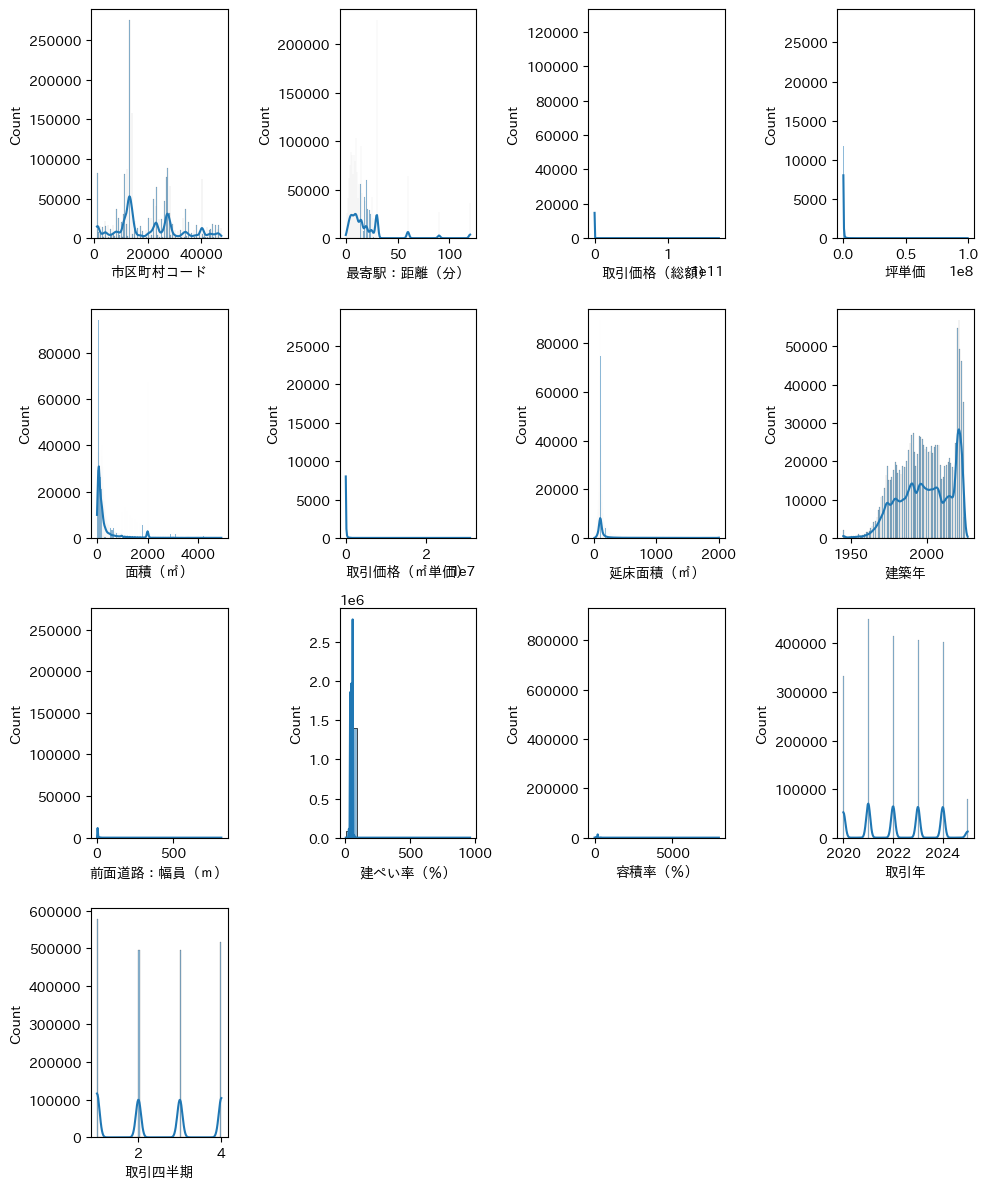

In [25]:
numerical_columns = df.select_dtypes(include=['number']).columns

# Plotting histograms for each numerical data column
plt.figure(figsize=(10, 12))
for i, column in enumerate(numerical_columns):
    ax = plt.subplot(len(numerical_columns) // 4 + 1, 4, i + 1)
    sns.histplot(data=df, x=column, kde=True)

plt.tight_layout()
plt.show()

In [27]:
df.select_dtypes(include=['number']).columns

Index(['市区町村コード', '最寄駅：距離（分）', '取引価格（総額）', '坪単価', '面積（㎡）', '取引価格（㎡単価）',
       '延床面積（㎡）', '建築年', '前面道路：幅員（ｍ）', '建ぺい率（％）', '容積率（％）', '取引年', '取引四半期'],
      dtype='object')

In [ ]:
df.groupby(['都道府県名','市区町村コード'])[numerical_columns].transform(lambda x:
                              x.fillna(x.mean()))

,市区町村コード,最寄駅：距離（分）,取引価格（総額）,坪単価,面積（㎡）,取引価格（㎡単価）,延床面積（㎡）,建築年,前面道路：幅員（ｍ）,建ぺい率（％）,容積率（％）,取引年,取引四半期
0,43101,17.987234,31000000,482211.314476,325.0,145835.108153,135.000000,1988.000000,5.000000,60.0,200.0,2021.0,1.0
1,43101,5.000000,57000000,482211.314476,370.0,145835.108153,200.000000,1999.000000,4.000000,60.0,200.0,2021.0,1.0
2,43101,20.000000,45000000,482211.314476,230.0,145835.108153,130.000000,2006.000000,4.000000,60.0,200.0,2021.0,2.0
3,43101,20.000000,39000000,482211.314476,255.0,145835.108153,140.000000,1999.000000,7.590837,40.0,80.0,2021.0,3.0
4,43101,5.000000,78000000,482211.314476,645.0,145835.108153,210.000000,1973.000000,5.000000,60.0,200.0,2021.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288084,44462,23.000000,16000000,38498.260870,350.0,11653.913043,155.000000,2003.000000,5.000000,60.0,200.0,2021.0,4.0
1288085,44462,26.000000,20000000,38498.260870,700.0,11653.913043,260.000000,1978.000000,15.000000,65.2,208.0,2020.0,1.0
1288086,44462,28.000000,200000,38498.260870,120.0,11653.913043,40.000000,1955.000000,5.942308,65.2,208.0,2023.0,4.0
1288087,44462,18.000000,4800000,56000.000000,280.0,17000.000000,142.222222,1988.371429,15.000000,65.2,208.0,2023.0,3.0


In [ ]:
# df.groupby("name").transform(lambda x: x.fillna(x.mean()))

In [28]:
df

,種類,価格情報区分,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,取引価格（総額）,...,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時期,改装,取引の事情等,取引年,取引四半期
0,宅地(土地と建物),成約価格情報,NaN,43101,熊本県,熊本市中央区,出水,NaN,NaN,31000000,...,NaN,5.0,２中住専,60.0,200.0,2021年第1四半期,NaN,NaN,2021.0,1.0
1,宅地(土地と建物),成約価格情報,NaN,43101,熊本県,熊本市中央区,出水,水前寺公園,5.0,57000000,...,私道,4.0,２中住専,60.0,200.0,2021年第1四半期,NaN,NaN,2021.0,1.0
2,中古マンション等,成約価格情報,NaN,43101,熊本県,熊本市中央区,京町本丁,上熊本(ＪＲ・熊本電鉄),10.0,33000000,...,NaN,NaN,NaN,NaN,NaN,2021年第1四半期,NaN,NaN,2021.0,1.0
3,中古マンション等,成約価格情報,NaN,43101,熊本県,熊本市中央区,京町本丁,NaN,NaN,25000000,...,NaN,NaN,２中住専,NaN,NaN,2021年第1四半期,NaN,NaN,2021.0,1.0
4,中古マンション等,成約価格情報,NaN,43101,熊本県,熊本市中央区,新大江,水前寺,3.0,1800000,...,NaN,NaN,NaN,NaN,NaN,2021年第1四半期,NaN,NaN,2021.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086731,農地,不動産取引価格情報,NaN,44462,大分県,玖珠郡玖珠町,大字四日市,NaN,NaN,300000,...,NaN,NaN,NaN,NaN,NaN,2022年第4四半期,NaN,NaN,2022.0,4.0
2086732,農地,不動産取引価格情報,NaN,44462,大分県,玖珠郡玖珠町,大字四日市,NaN,NaN,1500000,...,NaN,NaN,NaN,NaN,NaN,2022年第4四半期,NaN,NaN,2022.0,4.0
2086733,林地,不動産取引価格情報,NaN,44462,大分県,玖珠郡玖珠町,大字四日市,NaN,NaN,680000,...,NaN,NaN,NaN,NaN,NaN,2021年第4四半期,NaN,NaN,2021.0,4.0
2086734,林地,不動産取引価格情報,NaN,44462,大分県,玖珠郡玖珠町,大字四日市,NaN,NaN,30000,...,NaN,NaN,NaN,NaN,NaN,2021年第2四半期,NaN,NaN,2021.0,2.0


In [31]:
print(df[df.種類=='中古マンション等'].isna().sum())

種類                 0
価格情報区分             0
地域            591597
市区町村コード            0
都道府県名              0
市区町村名              0
地区名                5
最寄駅：名称         13896
最寄駅：距離（分）      36787
取引価格（総額）           0
坪単価           591597
間取り            17099
面積（㎡）              0
取引価格（㎡単価）     591597
土地の形状         591597
間口            591597
延床面積（㎡）       591597
建築年            17404
建物の構造          28554
用途            379878
今後の利用目的       320110
前面道路：方位       591597
前面道路：種類       591597
前面道路：幅員（ｍ）    591597
都市計画           53071
建ぺい率（％）       314038
容積率（％）        314038
取引時期               0
改装            335096
取引の事情等        589528
取引年                0
取引四半期              0
dtype: int64


In [57]:
df[df.種類=='中古マンション等'].to_csv('pre_owned_residence.csv',index=False)

In [55]:
df.to_csv('deals.csv',index=False)

In [51]:
# from google.colab import userdata
# userdata.get('GITHUB_TOKEN')

In [77]:
# https:/{USER}:{GITHUB_TOKEN}@github.com/colab.git